# Kannusteet, työllistymis- ja efektiivinen veroaste
Antti Tanskanen,
2.12.2022

Efektiivinen veroaste kertoo, paljonko ansaituista lisäansioista menee verojen kasvamiseen ja etuuksien pienenemisen. Työllistymisveroaste taas kertoo, mikä osuus siirtyminen työttömyydestä työhön tuomista palkkatuloista menee veroihin ja etuuksien pienenemiseen. Tulokset ovat erilaisille perheille erilaisia, erityisesti johtuen erilaisista etuuksista. Työllistymisveroaste määritellään

$$
V=1-\frac{T_2-T_1}{\Delta t},
$$

missä $T_1$ on nettotulot työttömänä sisältäen etuudet, $T_2$ on nettotulot työllistyneenä, $\Delta t$ on työstä saatava palkka. Efektiivinen marginaalivero lasketaan samalla kaavalla.

Jos esimerkiksi työttömänä käteen jää 100 e/kk, ja työllistyneenä 500 euron kuukausipalkasta jää 300 e/kk käteen verojen ja etuuksien pienentymisen jälkeen, on työllistymisveroaste 60 prosentti.

Efektiivinen marginaalivero kertoo, paljonko lisätulosta menee veroihin yms. Jos tulotaso nyt on 1500 e/kk ja siitä jää käteen etuudet mukaanlukien 1400 e/kk. Jos lisätyöllä bruttotulon saa nostettua 2000 euroon kuukaudessa, josta jää 1600 e/kk käteen (etuudet mukana), on efektiivinen veroaste 60 prosenttia.

Tarkempaa tietoa veroasteiden laskennasta löytyy esimerkiksi julkaisuista Kärkkäinen ja Tervola [2018] ja Viitamäki [2015].

In [1]:
import fin_benefits
import numpy as np 
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 5]
imagedir='kuvat/'

## Tyyppitapauksia ja niiden korvausasteita

Lasketaan työllisyysveroaste, työnteon efektiivisen marginaalivero ja käteen jäävä ansio kirjaston avulla. Valitaan ensin tyyppitapaus. Muuttuja p kertoo tarkat tiedot laskennankohteesta, selite sisältää kuvauksen siitä ja parametri tulosta kehottaa printtaamaan selite:en.

In [2]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=1,kuntaryhmä=1,vuosi=2022,tulosta=True)

1 aikuinen, ei lapsia. Töissä, ei puolisoa


In [3]:
p

{'tyoton': 0,
 'ika': 30,
 'saa_ansiopaivarahaa': 0,
 't': 0,
 'vakiintunutpalkka': 2500,
 'perustulo': 0,
 'asumismenot_toimeentulo': 537,
 'asumismenot_asumistuki': 537,
 'lapsia': 0,
 'lapsia_paivahoidossa': 0,
 'aikuisia': 1,
 'veromalli': 0,
 'kuntaryhma': 0,
 'lapsia_kotihoidontuella': 0,
 'alle3v': 0,
 'ansiopvrahan_suojaosa': 1,
 'ansiopvraha_lapsikorotus': 1,
 'puoliso_tulot': 0,
 'puoliso_tyoton': 0,
 'puoliso_vakiintunutpalkka': 0,
 'puoliso_saa_ansiopaivarahaa': 0,
 'puoliso_tyottomyyden_kesto': 100,
 'tyottomyyden_kesto': 10,
 'saa_elatustukea': 0,
 'elakkeella': 0,
 'tyoelake': 0,
 'opiskelija': 0,
 'aitiysvapaalla': 0,
 'isyysvapaalla': 0,
 'kotihoidontuella': 0,
 'puoliso_t': 0,
 'asumismenot_yhdistetty': 537,
 'lapsia_alle_3v': 0,
 'lapsia_alle_kouluikaisia': 0,
 'puoliso_elakkeella': 0,
 'puoliso_opiskelija': 0,
 'puoliso_tyoelake': 0,
 'puoliso_aitiysvapaalla': 0,
 'puoliso_isyysvapaalla': 0,
 'puoliso_sairauspaivarahalla': 0,
 'puoliso_kotihoidontuella': 0}

In [4]:
fin_benefits.print_examples()

Tapaus 1:
1 aikuinen, ei lapsia. Töissä, ei puolisoa

Tapaus 2:
1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 3:
1 aikuinen, ei lapsia. Työtön (työmarkkinatuki), ei puolisoa

Tapaus 4:
1 aikuinen ja 1 lapsi. Töissä, ei puolisoa

Tapaus 5:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

Tapaus 6:
2 aikuista ja 2 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 7:
2 aikuista ja 1 lapsi. Työtön (ansiopvraha, peruste 2500 e/kk), puoliso työtön (työmarkkinatuki)

Tapaus 8:
2 aikuista ja 1 lapsi. Töissä, puoliso töissä (1250 e/kk).

4 1
Tapaus 9:
2 aikuista ja 3 lasta. Töissä, puoliso töissä (1250 e/kk).

Tapaus 10:
1 aikuinen ja 1 lapsi. Työtön (ansiopvraha, peruste 1500 e/kk), ei puolisoa

Tapaus 11:
1 aikuinen ja 3 lasta. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa

Tapaus 12:
2 aikuista ja 2 lasta. Työtön (työmarkkinatuki), puoliso töissä (1250 e/kk).

Tapaus 13:
2 aikuista ja 2 lasta. Työtön (ansiopvraha, peruste 1500 e/kk), p

In [5]:
# tarkasteluvuosi
year=2022

# Benefits sisältää etuuskoodin
ben=fin_benefits.Benefits(year=year)

# Marginals sisältää marginaalien plottausfunktiot
marg=fin_benefits.Marginals(ben,year=year,incl_alv=False,lang='eng')

# Töissä

Ja sitten lasketaan käteen jäävä tulo, efektiivinen marginaalivero, työllistymisveroaste ja osatyöstä kokoaikatyöhön siirtymän efektiivinen marginaalivero. Laskelmat tehdään 1 e/kk askelvälillä. Efektiivinen marginaalivero lasketaan 100 e/kk lisätulolla. Osatyöstä kokoaikatyöhön siirryttäessä palkka kaksinkertaistuu.

Jaotellaan vielä marginaalit niiden lähteiden mukaan. Nettopalkka sisältää kaikkien talouden aikuisten nettopalkat, kun taas vaaka-akselin Palkka tarkoittaa työllistyvän palkkaa.

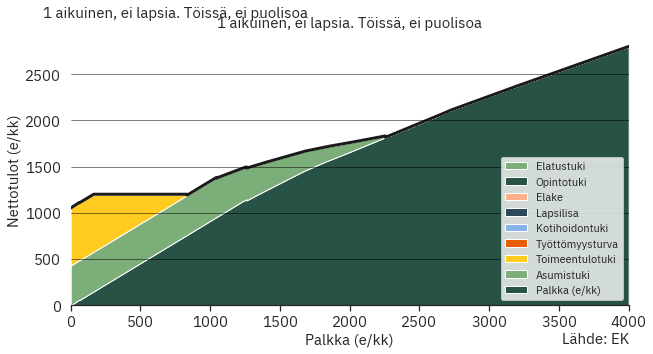

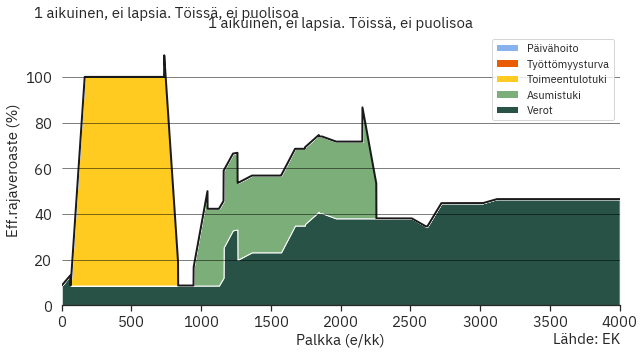

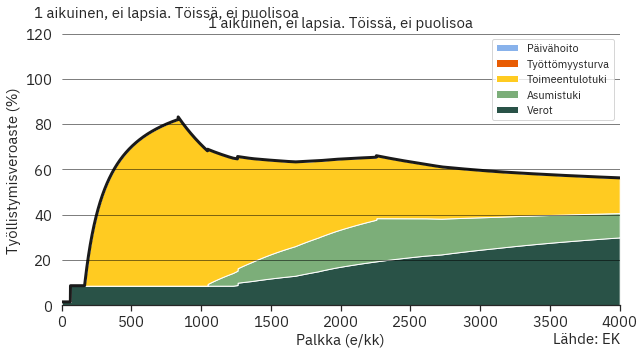

In [6]:
marg.laske_ja_plottaa_marginaalit(p,plot_tva=True,plot_osatva=False,figname=imagedir+'huoltaja_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=False,
                                 incl_opintotuki=False,max_salary=4000,palette_EK=True)

# Työtön

In [7]:
p,selite=fin_benefits.perheparametrit(perhetyyppi=0,kuntaryhmä=1,vuosi=2023,tulosta=True)

1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 1500 e/kk), ei puolisoa


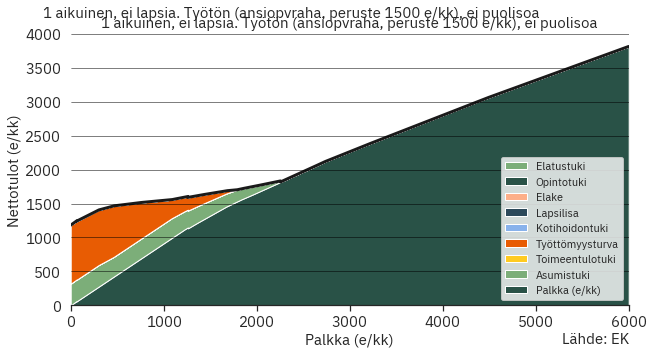

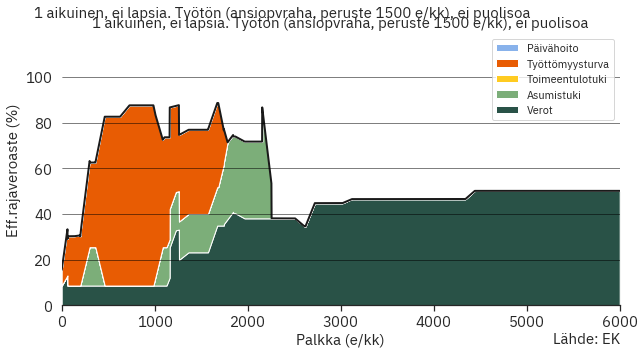

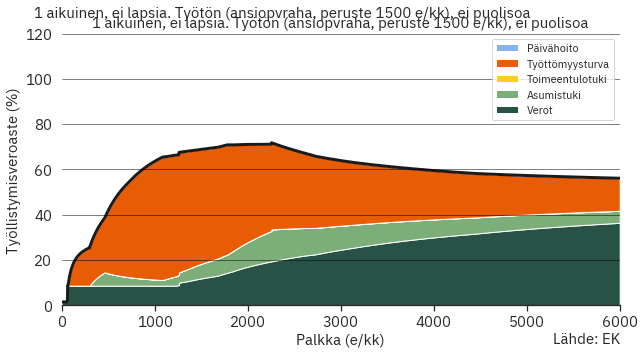

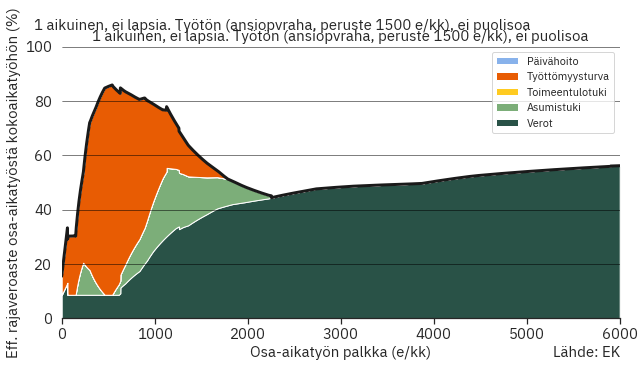

In [8]:
marg.laske_ja_plottaa_marginaalit(p,plot_tva=True,figname=imagedir+'huoltaja_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=False,
                                 incl_opintotuki=False,max_salary=6000,palette_EK=True)

# Ansiosidonnaiselta kokoaikatyöhön

1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 3500 e/kk), ei puolisoa
1 aikuinen, ei lapsia. Töissä, ei puolisoa


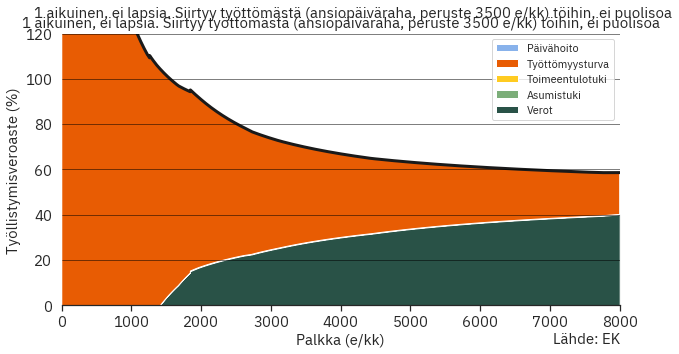

In [9]:
p0,selite0=fin_benefits.perheparametrit(perhetyyppi=53,tulosta=True,vuosi=2023,kuntaryhmä=4)
p2,selite2=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True,vuosi=2023,kuntaryhmä=4)

marg.laske_ja_plottaa_marginaalit(p2,p0=p0,plot_tva=True,plot_netto=False,plot_eff=False,plot_osatva=False,figname='huoltaja_gs_',
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=False,
                                 incl_opintotuki=False,palette_EK=True)

# Animaatio Ansiopäivärahan perusteesta

In [ ]:
p0,selite0=fin_benefits.perheparametrit(perhetyyppi=53,tulosta=True,vuosi=2023,kuntaryhmä=4)
p2,selite2=fin_benefits.perheparametrit(perhetyyppi=1,tulosta=True,vuosi=2023,kuntaryhmä=4)

marg.laske_ja_animoi_marginaalit(p2,p0=p0,plot_tva=True,figname='kuvat/anim.png',p_alku=1000,p_step=50,imax=100,
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=False,animate_p=False,
                                 incl_opintotuki=False,p_indeksi='vakiintunutpalkka',header=True)

Animoitu kuva näyttää tältä:

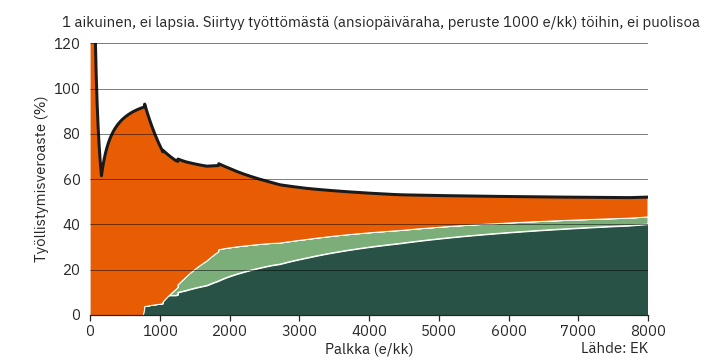

In [ ]:
p2,selite2=fin_benefits.perheparametrit(perhetyyppi=2,tulosta=True,vuosi=2023,kuntaryhmä=4)
plt.rcParams['figure.figsize'] = [10, 5]
marg.laske_ja_animoi_marginaalit(p2,plot_eff=True,plot_tva=False,figname='kuvat/anim2.png',p_alku=0,p_step=50,imax=100,
                                 grayscale=False,incl_perustulo=False,incl_elake=False,incl_alv=False,animate_p=True,
                                 incl_opintotuki=False,p_indeksi='vakiintunutpalkka')

1 aikuinen, ei lapsia. Työtön (ansiopvraha, peruste 2500 e/kk), ei puolisoa


Kuva:   0%|          | 0/100 [00:00<?, ?kuva/s]

Animoitu kuva näyttää tältä:

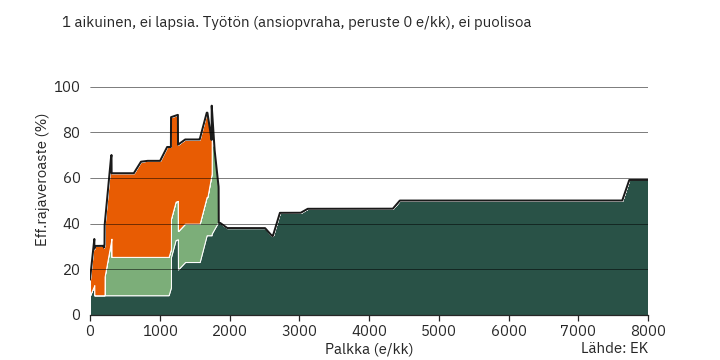

# Kokoelma esimerkkitapauksia

KeyboardInterrupt: 

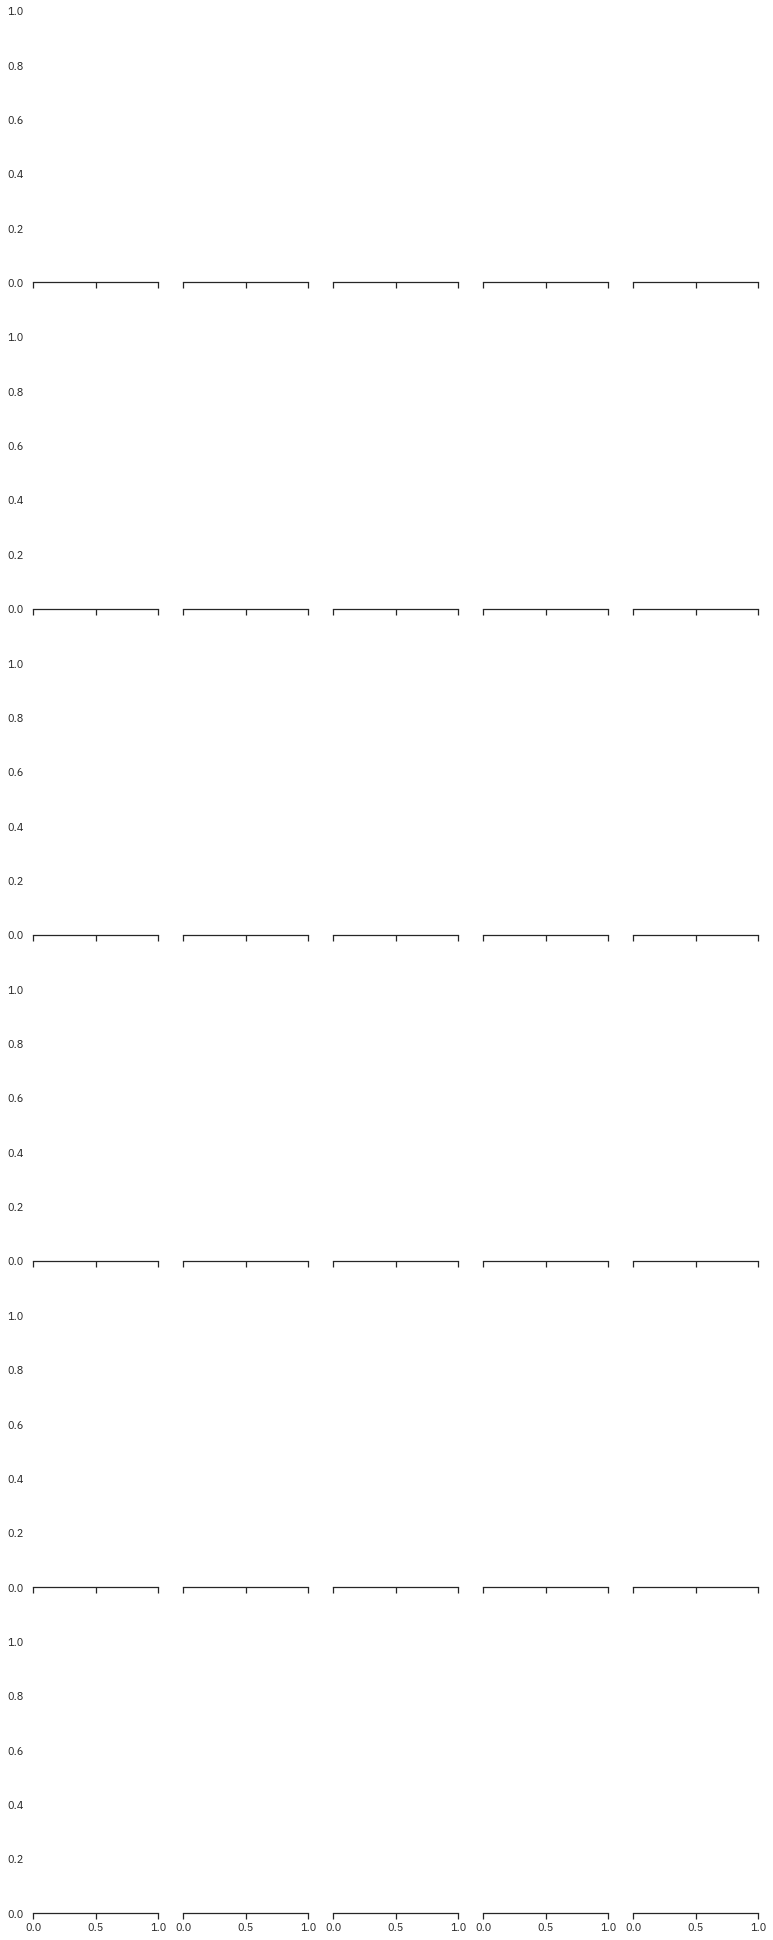

In [12]:
plt.rcParams['figure.figsize'] = [13, 35]
marg.laske_ja_plottaa_hila(type='tva',maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
plt.rcParams['figure.figsize'] = [13, 35]
marg.laske_ja_plottaa_hila(type='eff',maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

In [ ]:
plt.rcParams['figure.figsize'] = [13, 35]
marg.laske_ja_plottaa_hila(type='tulot',max_salary=6000,maxn=31,dire='')
plt.rcParams['figure.figsize'] = [10, 5]

# Kirjallisuus

[1] Viitamäki, H. Työnteon kannustimet - mitä jää käteen? VATT muistiot 50, https://vatt.fi/documents/2956369/3012213/muistio_50.pdf, 2015

[2] Kärkkäinen, O., Tervola, J. Talouspolitiikan vaikutukset tuloeroihin ja työllisyyteen 2015–2018, Valtioneuvoston selvitys- ja tutkimustoiminnan julkaisusarja 59/2018, http://julkaisut.valtioneuvosto.fi/handle/10024/161061, 2018